# Exploratory Data Analysis

PROBLEM STATEMENT:Perform EDA on the given dataset to predict possibility of 'survival' based on the feature vectors given in the dataset

In [23]:
import mysql.connector

In [24]:
#connecting to the server
mydb = mysql.connector.connect(
  host="localhost",               #hostname
  user="root",                   # the user who has privilege to the db
  passwd="root",               #password for user
  database="project2",               #database name

)

In [25]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's write a query to get table titanic from the database project2

In [26]:
query = "SELECT * FROM project2.titanic;"

Now let's just use the below pd.read_sql() method where in i will pass in the query and database to import the table and create a dataframe

In [27]:
df=pd.read_sql(query,mydb )

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [28]:
pd.set_option('display.max_rows',None)
df.head(10) #looking at the top 5 rows

,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [30]:
#looking at bottom 5 rows
df.tail()

,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [31]:
#returns the column labels of the given Dataframe
df.columns

Index(['Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [32]:
#checking number of rows and columns
df.shape

(891, 10)

In [33]:
#Creating a list of of all the ccolumns in the dataset
columns_list = list(df.columns)

#Getting unique values in each column
for i in columns_list:
    print('Number of unique values in column',i, 'is', df[i].nunique())


Number of unique values in column Survived is 2
Number of unique values in column Pclass is 3
Number of unique values in column Name is 891
Number of unique values in column Gender is 2
Number of unique values in column Age is 88
Number of unique values in column SibSp is 7
Number of unique values in column Parch is 7
Number of unique values in column Ticket is 681
Number of unique values in column Fare is 248
Number of unique values in column Embarked is 3


By the initial glance, we can understand that Passenger,Name will not play any role as it is just a unique number possibly given to each person. Hence, we can drop them.

In [34]:
#Dropping 'Passenger' and 'Name' column and storing the 'Passenger' and 'Name' dropped dataframe in df_cleaned
df_cleaned= df.drop(['Name'] ,axis=1)
#df_cleaned

Updating list of columns after dropping id column

In [35]:
columns_list = list(df_cleaned.columns)

In [36]:
#Checking for statistical summary for numeric series
df_cleaned.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [37]:
#Checking for statistical summary for object series
df_cleaned.describe(include=object)

,Gender,Ticket,Fare,Embarked
count,891,891,891,889
unique,2,681,248,3
top,male,347082,8.05,S
freq,577,7,43,644


In [38]:
#To get a quick overview of the dataset we use the dataframe.info() function
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 62.8+ KB


In [39]:
#Convert columns to the best possible dtypes using dtypes supporting
df_cleaned["Fare"] = df_cleaned["Fare"].astype('float')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


From we can see that,In 'Fare' data type changes to float

# DATA PRE-PROCESSING

# 1. Data Cleaning

In [40]:
#Checking for missing values in each column
df_cleaned.isnull()

,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [41]:
df_cleaned.isnull().sum()

Survived      0
Pclass        0
Gender        0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

INFERENCE:
    There are null values in 'Age','Cabin'and'Embarked'.we can treat them by dropping or imputation.

Method 1: Dropping rows or columns.

In [45]:
#df_v1= df_cleaned.drop(['Cabin'] ,axis=1)


In [43]:
df_cleaned

,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.00,1,0,A/5 21171,7.2500,S
1,1,1,female,38.00,1,0,PC 17599,71.2833,C
2,1,3,female,26.00,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.00,1,0,113803,53.1000,S
4,0,3,male,35.00,0,0,373450,8.0500,S
5,0,3,male,NaN,0,0,330877,8.4583,Q
6,0,1,male,54.00,0,0,17463,51.8625,S
7,0,3,male,2.00,3,1,349909,21.0750,S
8,1,3,female,27.00,0,2,347742,11.1333,S
9,1,2,female,14.00,1,0,237736,30.0708,C


In the cabin data set, we have 77% null values so it is not easy to handle the cabin feature that’s why I am droping Cabin column from my data set.

Method2:Imputation

In [44]:
df_cleaned['Age'] = df_cleaned['Age'].fillna(df_cleaned['Age'].mean())
df_cleaned


,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.000000,1,0,113803,53.1000,S
4,0,3,male,35.000000,0,0,373450,8.0500,S
5,0,3,male,29.699118,0,0,330877,8.4583,Q
6,0,1,male,54.000000,0,0,17463,51.8625,S
7,0,3,male,2.000000,3,1,349909,21.0750,S
8,1,3,female,27.000000,0,2,347742,11.1333,S
9,1,2,female,14.000000,1,0,237736,30.0708,C


But There are two null values in 'Embarked'column.we can treat them by imputing with mode

In [48]:
df_cleaned['Embarked']=df_cleaned['Embarked'].fillna(df['Embarked'].mode()[0])

In [49]:
df_cleaned.isnull().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

From the above output,We can  observe the are no null values

In [50]:
df_cleaned.shape

(891, 9)

In [51]:
df_cleaned.duplicated().sum()

15

There Duplicated values in Data set

In [53]:
df_cleaned[df_cleaned.duplicated()==True]

,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
201,0,3,male,29.699118,8,2,CA. 2343,69.5500,S
324,0,3,male,29.699118,8,2,CA. 2343,69.5500,S
409,0,3,female,29.699118,3,1,4133,25.4667,S
413,0,2,male,29.699118,0,0,239853,0.0000,S
466,0,2,male,29.699118,0,0,239853,0.0000,S
485,0,3,female,29.699118,3,1,4133,25.4667,S
612,1,3,female,29.699118,1,0,367230,15.5000,Q
641,1,1,female,24.000000,0,0,PC 17477,69.3000,C
644,1,3,female,0.750000,2,1,2666,19.2583,C
692,1,3,male,29.699118,0,0,1601,56.4958,S


In [54]:
newdf = df_cleaned.drop_duplicates()

In [55]:
newdf.shape

(876, 9)

In [56]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  876 non-null    int64  
 1   Pclass    876 non-null    int64  
 2   Gender    876 non-null    object 
 3   Age       876 non-null    float64
 4   SibSp     876 non-null    int64  
 5   Parch     876 non-null    int64  
 6   Ticket    876 non-null    object 
 7   Fare      876 non-null    float64
 8   Embarked  876 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 68.4+ KB


We can oberserve from above output duplicates are removed.

OUTLIERS

The numerical features available in the dataset are 'Survived','Pclass','Age','SibSp','Parch','Fare'. However, the features 'Survived', 'Pclass' ,'SibSp','Parch'are necessarily encoded categorical features.

In [57]:
newdf.columns

Index(['Survived', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Age'>

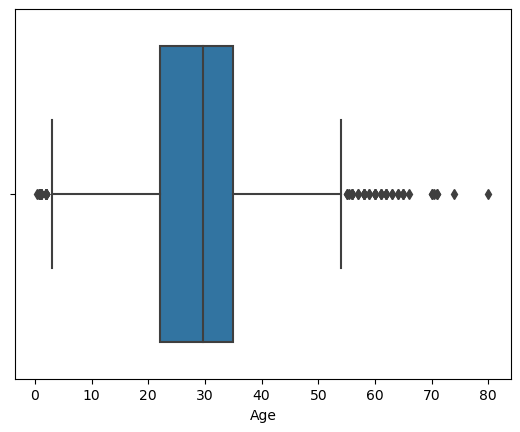

In [58]:
sns.boxplot(data=newdf, x='Age')

<AxesSubplot:xlabel='Fare'>

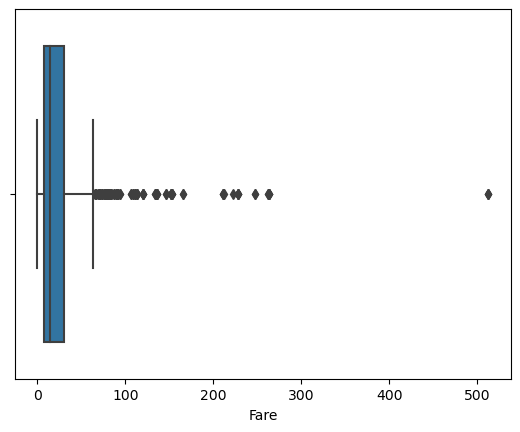

In [59]:
sns.boxplot(data=newdf, x='Fare')

There are outliers in both 'Age' and 'Fare' column

# DATA  VISUALIZATION

In [60]:
newdf['Survived'].value_counts()

0    540
1    336
Name: Survived, dtype: int64

 From the above result,334 out of 891 passengers in the traning data are survived.i.e.the number of people who survived is less than the number of people who are died.Now let's see what percentage of passengers survived using a pie plot.

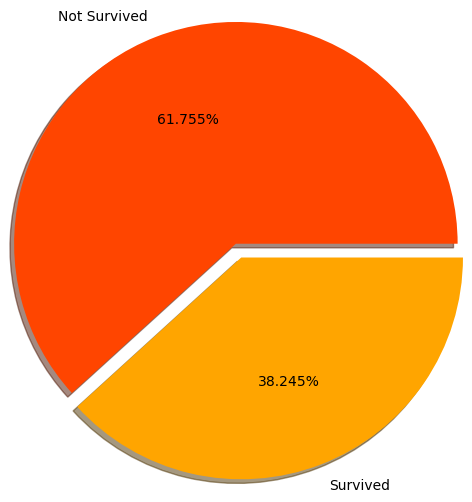

<Figure size 640x480 with 0 Axes>

In [61]:
df_grp = pd.DataFrame(newdf.groupby('Survived')['Survived'].count())
df_grp
colors = ['orangered','orange']
labels=['Not Survived', 'Survived']
plt.pie([549,340], labels=labels,autopct='%.3f%%', radius=1.5, colors=colors, shadow=True, explode=[0,0.1])
plt.show()
fig = plt.gcf()
fig.set_facecolor('black')

From the above  chart,38% of the passengers are survived based on this data.clearly,there is a slightly imbalance in the dataset

In [62]:
newdf.columns

Index(['Survived', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [63]:
columns_list = list(newdf.columns)

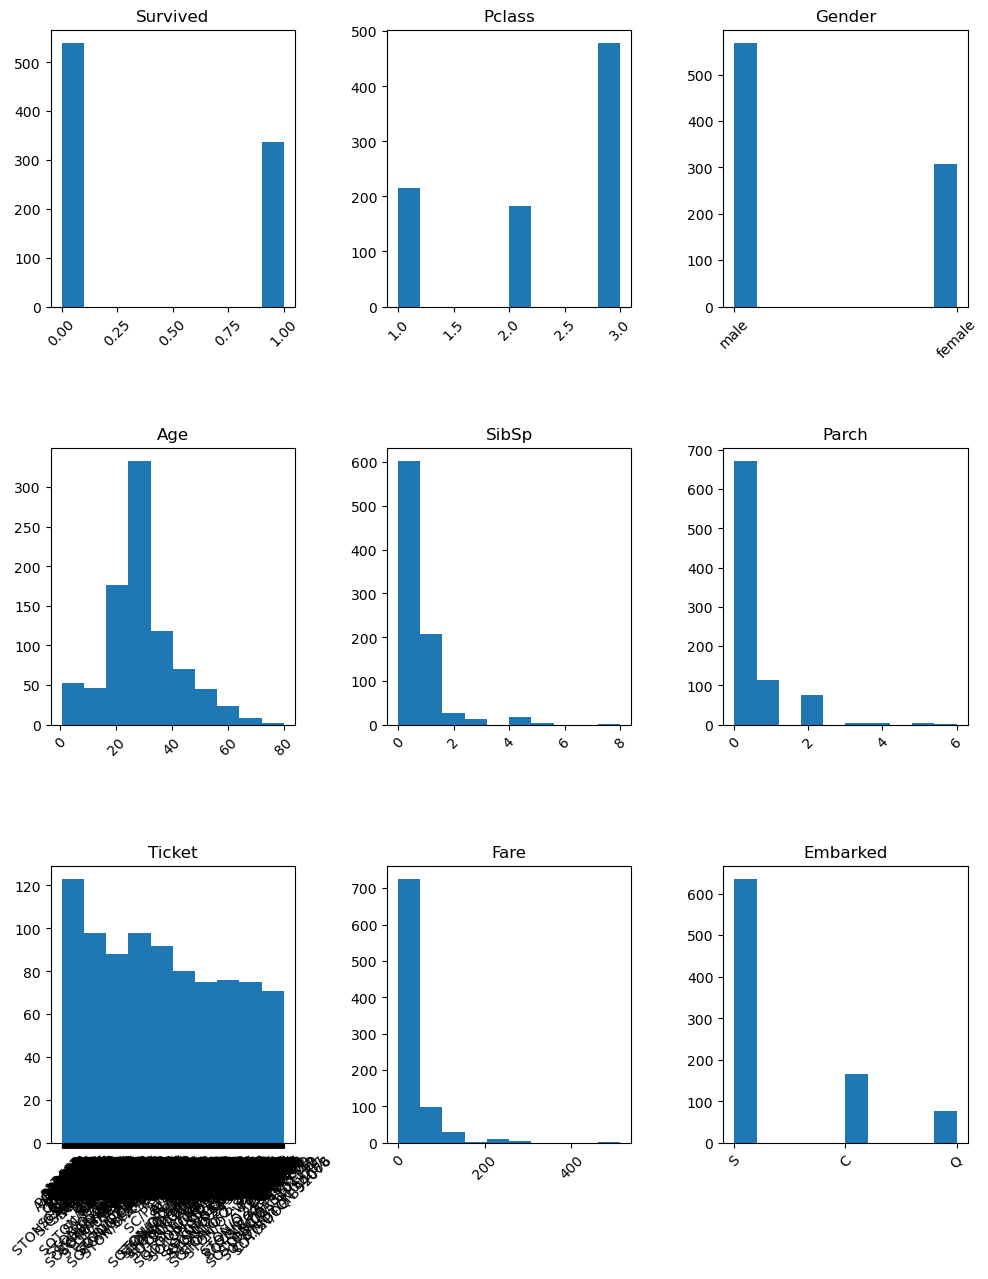

In [74]:
plt.figure(figsize=(10,20))
for i in range(len(columns_list)):
    plt.subplot(5,3,i+1)
    plt.title(columns_list[i])
    plt.xticks(rotation=45)
    plt.hist(newdf[columns_list[i]])
    
plt.tight_layout()


1. Univariate Analysis

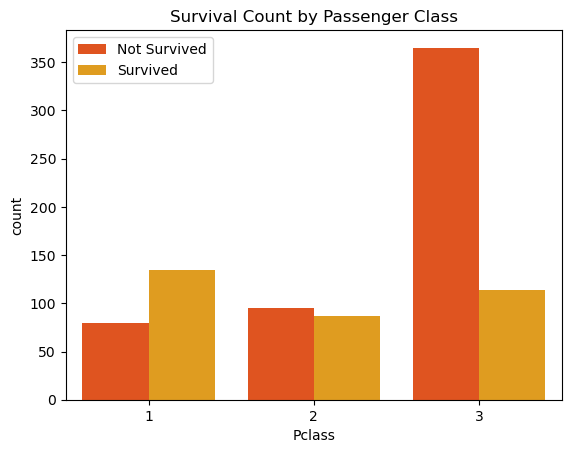

In [65]:
sns.countplot(data=newdf,x='Pclass',hue = newdf["Survived"],palette=['orangered','orange'])
plt.title("Survival Count by Passenger Class")
legend_labels = ["Not Survived", "Survived"]
plt.legend(legend_labels,loc='best')
plt.show()

Inference:

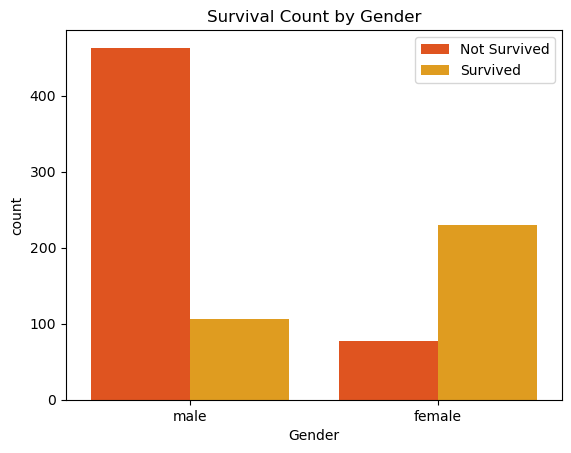

In [66]:
sns.countplot(data=newdf,x="Gender",hue = newdf["Survived"],palette=['orangered','orange'])
plt.title("Survival Count by Gender")
legend_labels = ["Not Survived", "Survived"]
plt.legend(legend_labels,loc='upper right')
plt.show()

Inference:

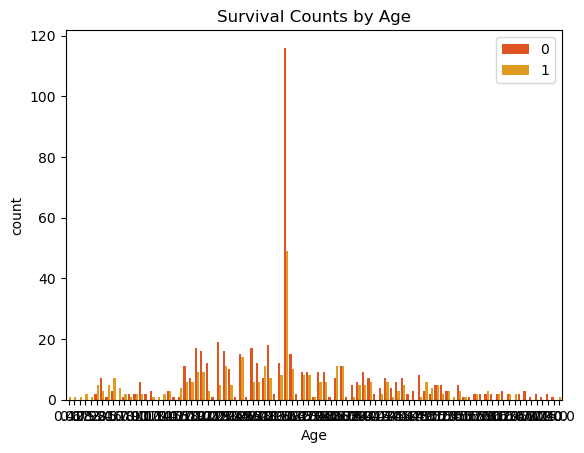

In [67]:
sns.countplot(x="Age",hue = newdf["Survived"],palette=['orangered','orange'],data = newdf)
plt.title("Survival Counts by Age")
plt.legend(loc='upper right')
plt.show()

Age is a numerical feature so we can’t plot a count plot for Age feature. we need to plot pdf for Age Feature.


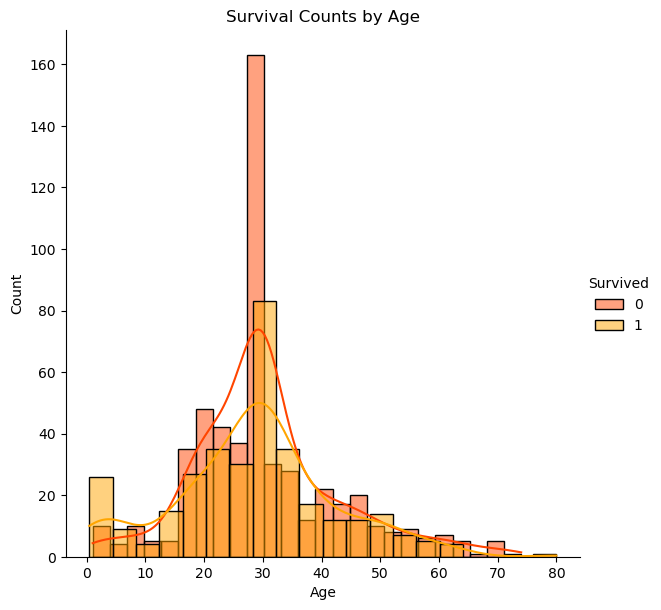

In [68]:
a = sns.FacetGrid(newdf,palette=['orangered','orange'], hue='Survived',height=6)\
    .map(sns.histplot, 'Age', kde=True)\
    .add_legend();
plt.title("Survival Counts by Age")
plt.show()

Inference:

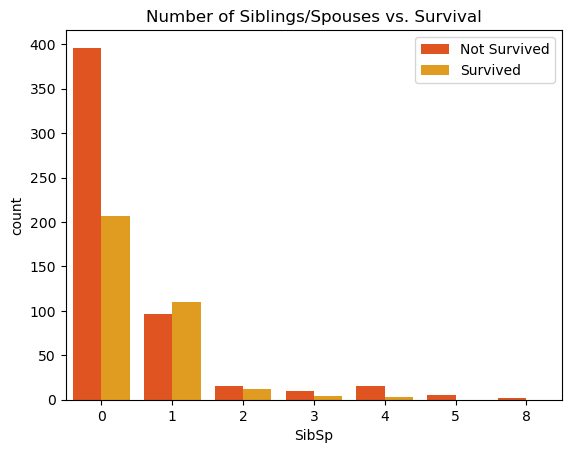

In [69]:
sns.countplot(x="SibSp",hue = newdf["Survived"],palette=['orangered','orange'],data = newdf)
plt.title("Number of Siblings/Spouses vs. Survival")
legend_labels = ["Not Survived", "Survived"]
plt.legend(legend_labels,loc='upper right')
plt.show()


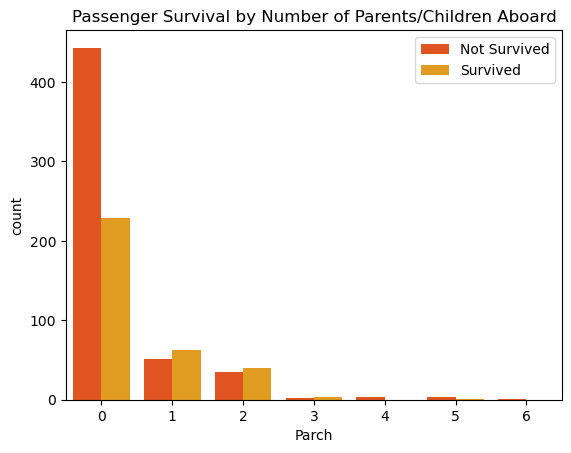

In [70]:
sns.countplot(x="Parch",hue = newdf["Survived"],palette=['orangered','orange'],data = newdf)
plt.title("Passenger Survival by Number of Parents/Children Aboard")
legend_labels = ["Not Survived", "Survived"]
plt.legend(legend_labels,loc='upper right')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


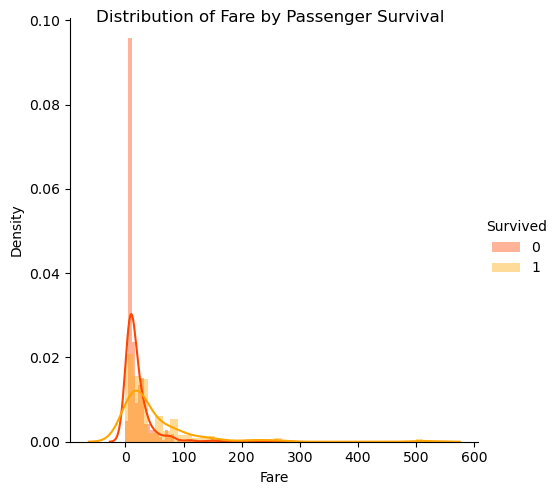

In [71]:
sns.FacetGrid(data=newdf,palette=['orangered','orange'], hue="Survived", size=5) \
 .map(sns.distplot,"Fare") \
 .add_legend();
plt.suptitle("Distribution of Fare by Passenger Survival")
plt.show();

Passengers who paid low fare have a higher chance to die. On the other hand, passengers who paid high fair have a higher chance to survive. This observation is the same as pclass.

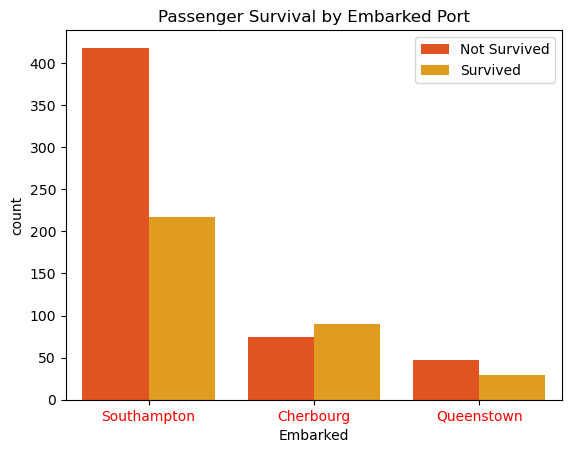

In [72]:
sns.countplot(x="Embarked",hue = newdf["Survived"],palette=['orangered','orange'],data = newdf)
plt.title("Passenger Survival by Embarked Port")
legend_labels = ["Not Survived", "Survived"]
plt.legend(legend_labels,loc='upper right')
plt.xticks([0, 1, 2], ['Southampton','Cherbourg','Queenstown'],color='red') 
plt.show()

Bi-variate Analysis-
Pair plots are the most widely used plots to perform visualization bi-variate analysis.

<Figure size 5000x7500 with 0 Axes>

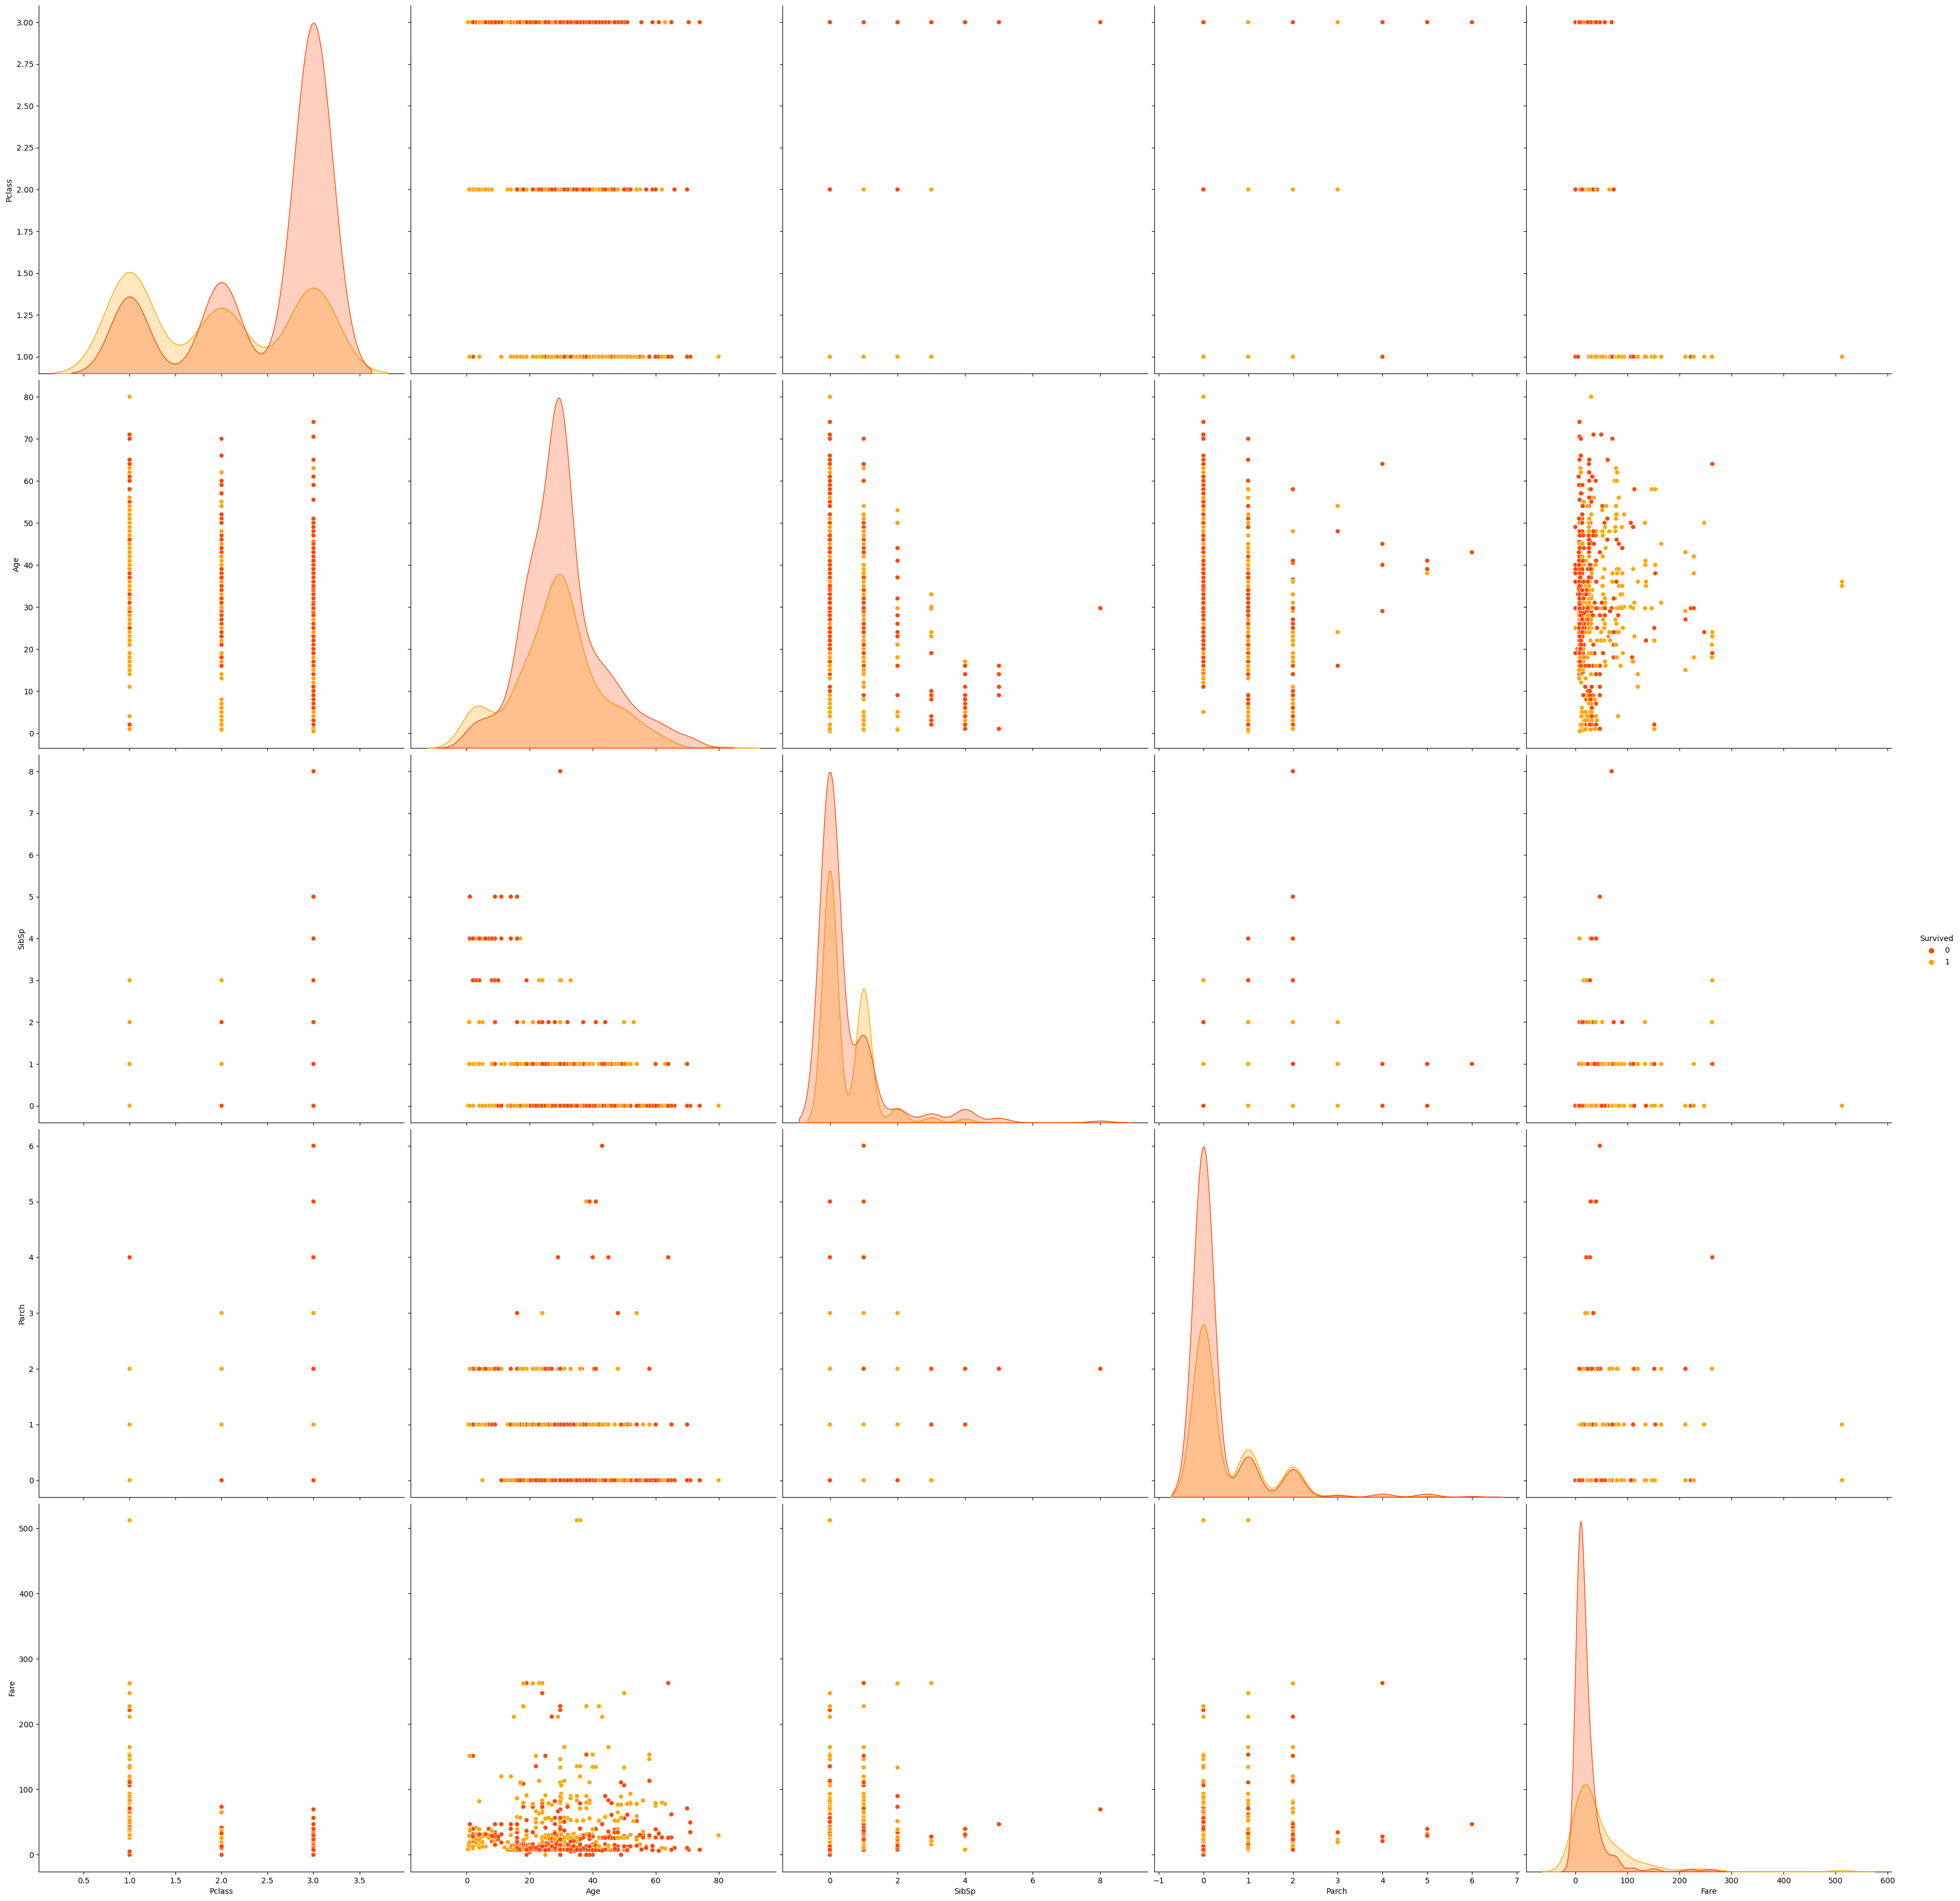

In [73]:
plt.figure(figsize=(50,75))
sns.pairplot(newdf, hue='Survived', height=7,palette=['orangered','orange'])
plt.show()